In [ ]:
%matplotlib inline
from bluesky import RunEngine
from bluesky.plan_stubs import mv
from bluesky.plans import scan, list_scan, grid_scan, list_grid_scan, \
    spiral, spiral_square, rel_spiral
from ophyd.sim import det, det4, motor, motor1, motor2
from matplotlib.pyplot import ion
from bluesky.utils import install_nb_kicker
install_nb_kicker()

ion()

from jupyter_plot import JupyterLivePlot, JupyterLiveScatter, JupyterLiveGrid

In [ ]:
RE = RunEngine()

motor.delay = 0.25
motor1.delay = 0.25
motor2.delay = 0.25

## Scan

In [ ]:
help(scan)

In [ ]:
RE(
    scan([det4], motor1, -1.5, 2, motor2, 1.3, -0.75, num=20), [JupyterLiveScatter('motor1', 'motor2', 'det4', xlim=(-1.75, 2.25), ylim=(-1, 1.5))]
)

## List Scan

In [ ]:
help(list_scan)

In [ ]:
RE(
    list_scan([det], motor, [-1.3, -1.2, 0, 1.8, 2], motor1, [1.3, 1.2, -0.2, -1.3, -1.4]), [JupyterLiveScatter(motor.name, motor1.name, det.name)]
)

## Grid Scan

In [ ]:
help(grid_scan)

In [ ]:
motor1.delay = 0.1
motor2.delay = 0.1
RE(
    grid_scan([det4], motor1, -1, 1, 10, motor2, -1, 1, 10), [JupyterLiveGrid((10, 10), det4.name)]
)
motor1.delay = 0.25
motor2.delay = 0.25

In [ ]:
motor1.delay = 0.05
motor2.delay = 0.05
RE(
    grid_scan([det4], motor1, -5, 5, 20, motor2, -5, 5, 20, snake_axes=True), [JupyterLiveGrid((20, 20), det4.name)]
)
motor1.delay = 0.25
motor2.delay = 0.25

## List Grid Scan

In [ ]:
help(list_grid_scan)

In [ ]:
RE(
    list_grid_scan([det4], motor1, [-1, -0.5, 0, 0.5, 1, 1.5], motor2, [-1.5, -1, -0.5, 0, 0.5, 1]), [JupyterLiveGrid((6, 6), det4.name, extent=[-1.75, 1.25, -1.25, 1.75])]
)

## Spiral Scans

In [ ]:
help(spiral)

In [ ]:
RE(
    spiral(
        detectors=[det4],
        x_motor=motor1,
        y_motor=motor2,
        x_start=1,
        y_start=0,
        x_range=10,
        y_range=10,
        dr=5,
        dr_y=5,
        nth=36
    ), [JupyterLiveScatter(motor1.name, motor2.name, det4.name, xlim=(-10, 10), ylim=(-10, 10))]
)

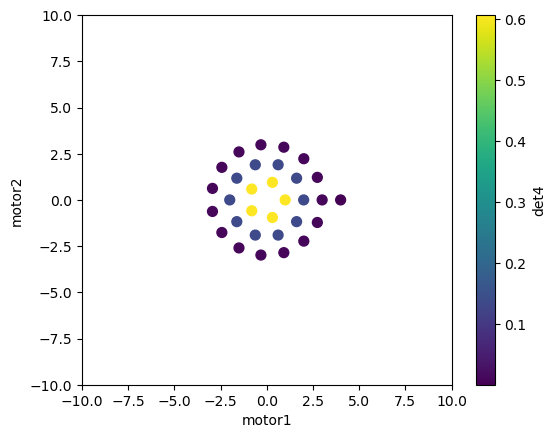

In [ ]:
RE(
    spiral(
        detectors=[det4],
        x_motor=motor1,
        y_motor=motor2,
        x_start=0,
        y_start=0,
        x_range=10,
        y_range=10,
        dr=1,
        dr_y=1,
        nth=5
    ), [JupyterLiveScatter(motor1.name, motor2.name, det4.name, xlim=(-10, 10), ylim=(-10, 10))]
)

## Square Spiral Scan

In [ ]:
help(spiral_square)

In [ ]:
motor1.delay = 0.1
motor2.delay = 0.1
RE(
    spiral_square(
        detectors=[det4],
        x_motor=motor1,
        y_motor=motor2,
        x_center=-2,
        y_center=-2,
        x_range=8,
        y_range=8,
        x_num=20,
        y_num=20
    ), [JupyterLiveScatter(motor1.name, motor2.name, det4.name, xlim=(-6, 2), ylim=(-6, 2))]
)

motor1.delay = 0.25
motor2.delay = 0.25

## Relative Spiral

In [ ]:
help(rel_spiral)

In [ ]:
RE(mv(motor1, 3))
RE(mv(motor2, -1))
RE(
    rel_spiral(
        detectors=[det4],
        x_motor=motor1,
        y_motor=motor2,
        x_range=10,
        y_range=10,
        dr=1.5,
        dr_y=1.5,
        nth=10
    ), [JupyterLiveScatter(motor1.name, motor2.name, det4.name, xlim=(-5, 10), ylim=(-7.5, 7.5))]
)

### Exercícios

1. Obtenha um heatmap dos dados do detector 'det5' no intervalo	-4 mm até 8 mm no motor 'jittery_motor1' e no intervalo -6mm até 13mm no motor 'jittery_motor2'. 	

2. Faça 15 aquisições com o detector 'det5' com ponto inicial (-2, -7) e com ponto final (3.5, 5.2).  

3. Faça três scans circulares com raio 4, 8 e 12 milimetros com centro -3 mm no motor 'jittery_motor1' e -2 mm no motor 'jittery_motor2', faça cada aquisição com 20º graus de difereça entre os pontos. 

4. Faça aquisições com o detector 'det5' nos pontos (-1, 4), (0, 0.5), (-3, 0.2), (0.4, -1.2) e (-1.3, 0.85) e plote ele com um ScatterPlot.

> Considere os motores correspondentes aos pontos como: ('jittery_motor1', 'jittery_motor2')